In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.pipeline import Pipeline

In [8]:
from sklearn.compose import ColumnTransformer

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.ensemble import RandomForestClassifier


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [12]:
df = pd.read_csv("diabetes.csv")

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols] = df[cols].replace(0, np.nan)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[cols] = imputer.fit_transform(df[cols])

In [15]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
numeric_features = X.columns.tolist()
numeric_transformer = Pipeline([("scaler", StandardScaler())])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features)
])

pipe_lr = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", LogisticRegression(max_iter=1000))
])

pipe_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42))
])

pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Accuracy: 0.7792207792207793
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



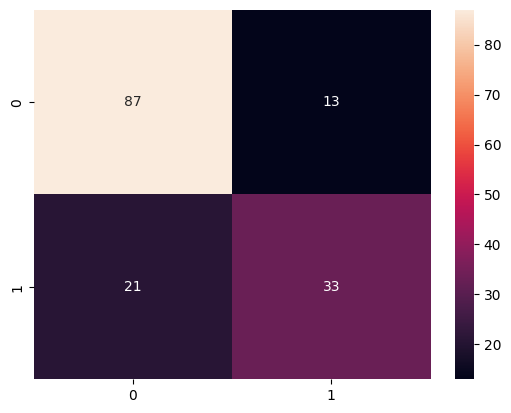

In [17]:
y_pred = pipe_rf.predict(X_test)
y_proba = pipe_rf.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [18]:
import joblib
joblib.dump(pipe_rf, "diabetes_model.pkl")
print("Model saved!")

Model saved!


In [19]:
sample = pd.DataFrame([{
    "Pregnancies": 2,
    "Glucose": 120,
    "BloodPressure": 70,
    "SkinThickness": 20,
    "Insulin": 100,
    "BMI": 30,
    "DiabetesPedigreeFunction": 0.5,
    "Age": 25
}])
result = pipe_rf.predict(sample)
prob = pipe_rf.predict_proba(sample)[:,1]

print("Diabetes Prediction:", result[0])
print("Probability:", prob[0])

Diabetes Prediction: 0
Probability: 0.1
